# Libraries Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

# Path definition
path_mob = "/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/20_Data/raw_data_LFB_Mobilisation/"
path_inc = "/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/20_Data/raw_data_LFB_Incident/"
path_df = "/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/Fire_Brigade/20_Data/raw_data_LFB_merged/"

# 1. Data Load

### 1.1 Mobilisation

In [ ]:
lfb_mob_09_14 = pd.read_excel(path_mob+"LFB Mobilisation data from January 2009 - 2014.xlsx")
lfb_mob_15_20 = pd.read_excel(path_mob+"LFB Mobilisation data from 2015 - 2020.xlsx")
lfb_mob_20_24 = pd.read_excel(path_mob+"LFB Mobilisation data 2021 - 2024.xlsx")


In [ ]:
lfb_mob_09_14.info()

In [ ]:
lfb_mob_15_20.info()

In [ ]:
lfb_mob_20_24.info()

#### Check Variable Similarity

In [ ]:
((lfb_mob_20_24.columns == lfb_mob_09_14.columns) & (lfb_mob_15_20.columns == lfb_mob_09_14.columns)) # true

#### Total number of variables: 22

#### Stack Mobilization dataframes

In [ ]:
df_mob = pd.concat([lfb_mob_09_14, lfb_mob_15_20, lfb_mob_20_24], axis = 0)

#### Verify concatonated dataframe lengths

In [ ]:
df_mob.shape[0] == (lfb_mob_09_14.shape[0] + lfb_mob_15_20.shape[0] + lfb_mob_20_24.shape[0]) # True

In [ ]:
df_mob.to_csv(path_mob+'df_mob.csv', index=False)

### 1.2 Incident

In [ ]:
lfb_inc_09_17 = pd.read_csv(path_inc+"LFB Incident data from 2009 - 2017.csv")
lfb_inc_18_24 = pd.read_excel(path_inc+"LFB Incident data from 2018 onwards.xlsx")


In [ ]:
lfb_inc_09_17.info()

In [ ]:
lfb_inc_18_24.info()

#### Check Variable Similarity

In [ ]:
(lfb_inc_09_17.columns == lfb_inc_18_24.columns) #true

#### Number of variables: 39

### 1.3 Stack Incident dataframes

In [ ]:
df_inc = pd.concat([lfb_inc_09_17, lfb_inc_18_24], axis = 0)
df_inc.isna().sum()

In [ ]:
df_inc.to_csv(path_inc+'df_inc.csv', index=False)

# 2. Data Inspection

In [2]:
# load stored csv files
df_mob = pd.read_csv(path_mob+"df_mob.csv")
df_inc = pd.read_csv(path_inc+"df_inc.csv")


/var/folders/mf/b1lhfbsd0_v8415y834bgj_c0000gn/T/ipykernel_39690/1345236111.py:2: DtypeWarning: Columns (0,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mob = pd.read_csv(path_mob+"df_mob.csv")
/var/folders/mf/b1lhfbsd0_v8415y834bgj_c0000gn/T/ipykernel_39690/1345236111.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_inc = pd.read_csv(path_inc+"df_inc.csv")


### 2.1 Mobilisation (df_mob)

In [ ]:
df_mob.head(5)

In [ ]:
df_mob.tail(1)

In [ ]:
df_mob.AttendanceTimeSeconds.describe()

In [ ]:
df_mob.DelayCode_Description.unique()#value_counts()#.count()

In [ ]:
missing_values_count = df_mob.isna().sum()

missing_values_percentage = {}

for col in df_mob.columns:
    missing_values_percentage[col] = np.round((df_mob[col].isna().sum() / df_mob.shape[0] * 100), 2)

missing_values_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage (%)': missing_values_percentage
})

missing_values_summary


### 2.2 Incident (df_inc)

In [ ]:
df_inc.shape[0]

In [ ]:
df_inc.info()

In [ ]:
df_inc.columns


In [ ]:
df_inc.head(3)

In [ ]:
df_inc.tail(1)

In [ ]:
df_inc.NumCalls.value_counts()#.count()

In [ ]:
df_inc.NumCalls.describe()

In [ ]:
missing_values_count_inc = df_inc.isna().sum()

missing_values_percentage_inc = {}

for col in df_inc.columns:
    missing_values_percentage_inc[col] = np.round((df_inc[col].isna().sum() / df_inc.shape[0] * 100), 2)

missing_values_summary_inc= pd.DataFrame({
    'Missing Values Count': missing_values_count_inc,
    'Missing Values Percentage (%)': missing_values_percentage_inc
})

missing_values_summary_inc


### 2.3 Check data

In [ ]:
df_mob.IncidentNumber.value_counts()

In [ ]:
df_inc.IncidentNumber.value_counts()

In [ ]:
df_inc.NumCalls.value_counts()#.head(20)

# 3. Merge Raw Mobilisation & Incident Data Set

### 3.1 Check for multiple Incident Numbers in df_mob

In [ ]:
df_mob.IncidentNumber.value_counts() # incident number 053666-07052021 with 13 values

In [ ]:
df_mob.loc[df_mob.IncidentNumber == '053666-07052021', ["IncidentNumber", "PumpOrder"]] 
# there are cases with mulitple pumps involved in one incident (m x 1 relation)
# the PumpOrder variable describes the order of the pumps arrived in chronological order at the incident

### 3.2 Merge Raw Data Sets

In [3]:
# Drop ambiguous time colums in df_inc
df_inc = df_inc.drop(columns = ["DateOfCall","TimeOfCall", "CalYear", "HourOfCall"], axis = 1)

In [4]:
df_raw = pd.merge(df_mob, df_inc, on = "IncidentNumber", how = "inner") # merge both data sets
df_raw.info()

df_raw.to_csv(path_df+'df_raw.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346211 entries, 0 to 2346210
Data columns (total 56 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   IncidentNumber                          object 
 1   CalYear                                 int64  
 2   HourOfCall                              int64  
 3   ResourceMobilisationId                  int64  
 4   Resource_Code                           object 
 5   PerformanceReporting                    object 
 6   DateAndTimeMobilised                    object 
 7   DateAndTimeMobile                       object 
 8   DateAndTimeArrived                      object 
 9   TurnoutTimeSeconds                      float64
 10  TravelTimeSeconds                       float64
 11  AttendanceTimeSeconds                   int64  
 12  DateAndTimeLeft                         object 
 13  DateAndTimeReturned                     object 
 14  DeployedFromStation_Code          

# --------------------------

# 4. Load Merged df

In [3]:
df_raw = pd.read_csv(path_df+"df_raw.csv")

/var/folders/mf/b1lhfbsd0_v8415y834bgj_c0000gn/T/ipykernel_64248/3272938559.py:1: DtypeWarning: Columns (0,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(path_df+"df_raw.csv")


# --------------------------

# 5. Data Cleaning

**Total response time** is the minutes and seconds elapsed from the **time of call** to the **arrival** of the **first vehicle** to the incident. Time of call is based on the time that the call is received by Command and Control, that is, when it is received by the Fire Control room.

The following incidents are not included in response time totals:
- Road vehicle fires, where the road vehicle was abandoned.
- Where the location of the fire was a derelict property.
- Where an FRS learned of the fire when it was known to have already been extinguished (known as “late calls”).
- Where the total response time for an incident was over an hour or less than one minute (to avoid erroneous data or exceptional incidents from skewing the averages).
- Where the sequence of events (time of call - mobilisation - vehicle mobile - arrival at scene) in an incident is not recorded in a logical sequence, either through recording error (for example, a vehicle appears to have arrived before it left) or absence of data (null values).

__[Link: Definition total response time by UK Government](https://www.gov.uk/government/statistics/detailed-analysis-of-response-times-to-fires-year-to-march-2023/detailed-analysis-of-response-times-to-fires-attended-by-fire-and-rescue-services-england-april-2022-to-march-2023#:~:text=The%20average%20response%20time%20to%20primary%20fires%20was%209%20minutes,8%20minutes%20and%2038%20seconds)__


### 5.1 Filter for first arriving Pump (PumpOrder == 1)

In [4]:
df = df_raw.loc[df_raw.PumpOrder == 1].copy() # selecting only the first pump arriving at the incident
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1555790 entries, 0 to 2346210
Data columns (total 56 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   IncidentNumber                          1555790 non-null  object 
 1   CalYear                                 1555790 non-null  int64  
 2   HourOfCall                              1555790 non-null  int64  
 3   ResourceMobilisationId                  1555790 non-null  int64  
 4   Resource_Code                           1555790 non-null  object 
 5   PerformanceReporting                    1555790 non-null  object 
 6   DateAndTimeMobilised                    1555790 non-null  object 
 7   DateAndTimeMobile                       1534524 non-null  object 
 8   DateAndTimeArrived                      1555790 non-null  object 
 9   TurnoutTimeSeconds                      1534413 non-null  float64
 10  TravelTimeSeconds                  

### 5.2 Convert to Datetime Format

In [5]:
df = df.rename(columns={"DateAndTimeMobilised": "DateTimeCall"})
df.DateTimeCall.isna().sum() # 0 NaNs for DateTimeCall

0

In [6]:
# Convert DateTimeCall & DateAndTimeArrived to datetime format

date_format = '%Y-%m-%d %H:%M:%S'
df[["DateTimeCall", "DateAndTimeArrived"]] = df[["DateTimeCall", "DateAndTimeArrived"]].astype(str)

for col in df[["DateTimeCall", "DateAndTimeArrived"]]:
    df[col] = df[col].apply(lambda x: datetime.strptime(x, date_format))

df[["DateTimeCall", "DateAndTimeArrived"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1555790 entries, 0 to 2346210
Data columns (total 2 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   DateTimeCall        1555790 non-null  datetime64[ns]
 1   DateAndTimeArrived  1555790 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 35.6 MB


### 5.3 Calculate Total Response Time

In [7]:
# Calculate Total Response Time
df["TotalResponseTime"] = df["DateAndTimeArrived"] - df["DateTimeCall"]
df['TotalResponseTime'] = pd.to_timedelta(df['TotalResponseTime'])
df['TotalResponseTime'] = df['TotalResponseTime'].dt.total_seconds()

df.head()

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateTimeCall,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,TotalResponseTime
0,235138081,2009,0,38426,H271,1,2009-01-01 00:02:27,NaN,2009-01-01 00:07:46,NaN,NaN,319,2009-01-01 00:16:46,2009-01-01 00:23:55,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014010,Battersea Park,Battersea Park,528652.000,176830.000,528650,176850,51.476,-0.149,London,Battersea,319.000,Battersea,342.000,Clapham,2.000,2.000,2,60,255,1.000,319.000
2,2091,2009,0,38429,A341,1,2009-01-01 00:04:09,2009-01-01 00:06:40,2009-01-01 00:09:17,151.000,157.000,308,2009-01-01 00:16:33,2009-01-01 00:17:48,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,NaN,NaN,E09000010,ENFIELD,Enfield,E05013682,Haselbury,Haselbury,533773.000,194492.000,533750,194450,51.633,-0.068,London,Edmonton,308.000,Edmonton,NaN,NaN,1.000,1.000,1,60,255,2.000,308.000
3,3091,2009,0,38430,G232,1,2009-01-01 00:04:57,2009-01-01 00:06:45,2009-01-01 00:08:27,108.000,102.000,210,2009-01-01 00:20:38,2009-01-01 00:20:38,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,100021491527.000,21401491.000,E09000017,HILLINGDON,Hillingdon,E05013571,Hillingdon East,Hillingdon East,507738.000,182805.000,507750,182850,51.534,-0.448,London,Hillingdon,210.000,Hillingdon,NaN,NaN,1.000,1.000,1,60,255,2.000,210.000
4,5091,2009,0,38432,A311,1,2009-01-01 00:06:04,2009-01-01 00:07:58,2009-01-01 00:09:57,114.000,119.000,233,2009-01-01 00:11:58,2009-01-01 00:22:29,A31,Holloway,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,NaN,NaN,E09000019,ISLINGTON,Islington,E05013708,Laycock,Laycock,531058.000,185307.000,531050,185350,51.551,-0.111,London,Holloway,233.000,Holloway,250.000,Holloway,1.000,2.000,2,60,255,1.000,233.000
6,6091,2009,0,38434,A432,1,2009-01-01 00:06:30,2009-01-01 00:07:53,2009-01-01 00:09:22,83.000,89.000,172,2009-01-01 00:15:57,2009-01-01 00:23:10,A43,Kentish Town,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,NW5,0.000,20499122.000,E09000007,CAMDEN,Camden,E05013663,Kentish Town North,Kentish Town North,NaN,NaN,529450,185250,NaN,NaN,London,Kentish Town,172.000,Kentish Town,222.000,Kentish Town,1.000,2.000,2,60,255,1.000,172.000


#### Filter for Observations with Response Time >= 60 seconds (see UK definition)

In [8]:
from scipy.stats import shapiro
import statsmodels.api as sm

stat, p = shapiro(df["TotalResponseTime"])
print('Shapiro-Wilk Test Statistic:', stat)
print('p-value:', p)

# Interpretation
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Shapiro-Wilk Test Statistic: 0.9072632362881673
p-value: 1.2796980128054626e-156
Sample does not look Gaussian (reject H0)


/Users/bennyschellinger/miniforge3/envs/lfb_env/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1555790.
  res = hypotest_fun_out(*samples, **kwds)


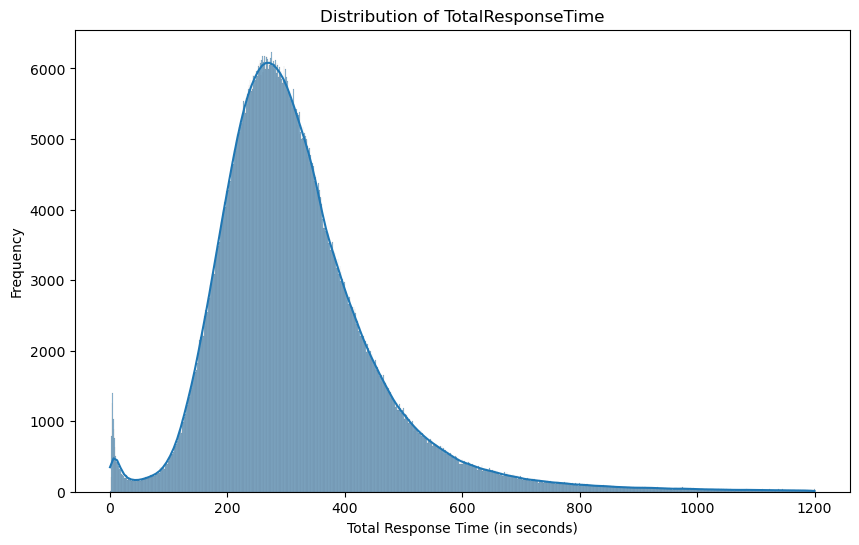

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df["TotalResponseTime"], bins=1200, kde=True)
plt.title(f'Distribution of {"TotalResponseTime"}')
plt.xlabel("Total Response Time (in seconds)")
plt.ylabel('Frequency')
plt.show()

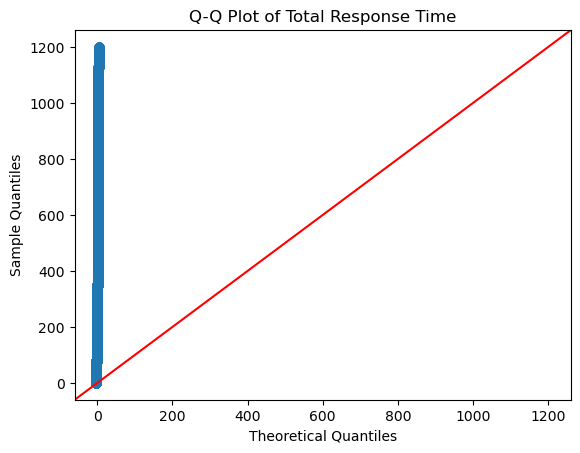

In [9]:
sm.qqplot(df["TotalResponseTime"], line='45')
plt.title('Q-Q Plot of Total Response Time')
plt.show()

In [10]:
df = df[df["TotalResponseTime"] >= 60]
df.shape

(1537704, 57)

/Users/bennyschellinger/miniforge3/envs/lfb_env/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1555790.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test Statistic after log transformation: 0.9072632362881673
p-value: 1.2796980128054626e-156
Sample does not look Gaussian (reject H0)


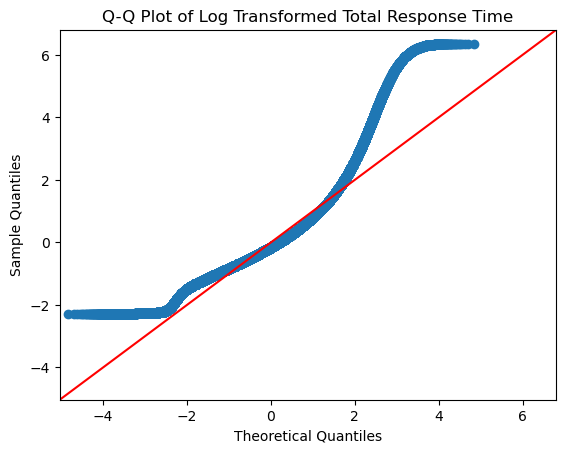

In [13]:
mean = df["TotalResponseTime"].mean()
std_dev = df["TotalResponseTime"].std()

df["TotalResponseTime_std"] = df["TotalResponseTime"].apply(lambda x: ((x - mean) / std_dev))
stat, p = shapiro(df["TotalResponseTime_std"])
print('Shapiro-Wilk Test Statistic after log transformation:', stat)
print('p-value:', p)

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

sm.qqplot(df["TotalResponseTime_std"], line='45')
plt.title('Q-Q Plot of Log Transformed Total Response Time')
plt.show()

### 5.4 Drop non-relevant Columns

#### Check & Clean WardNames & WardNamesNew

In [11]:
(df.IncGeo_WardName == df.IncGeo_WardNameNew).value_counts()

True     1537384
False        320
Name: count, dtype: int64

In [12]:
ward_false = df.IncGeo_WardName != df.IncGeo_WardNameNew
mismatch_values = df[ward_false][["IncGeo_WardName", "IncGeo_WardNameNew"]] # show exact mismatched values in our dataframe
mismatch_values.value_counts() # drop column "IncGeo_WardName"

IncGeo_WardName  IncGeo_WardNameNew
St Mary's        St. Mary's            3
St Mary's Park   St. Mary's Park       1
St Michael's     St. Michael's         1
St Peter's       St. Peter's           1
Name: count, dtype: int64

#### Create Number of Calls Bins

In [19]:
df['NumCalls'] = df['NumCalls'].fillna(1)

def assign_bins(num_calls):
    if num_calls == 1:
        return '1'
    elif num_calls == 2:
        return '2'
    elif 3 <= num_calls <= 5:
        return '3-5'
    elif 6 <= num_calls <= 10:
        return '6-10'
    else:
        return '>10'

df['NumCalls_bins'] = df['NumCalls'].apply(assign_bins)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['NumCalls_bins_encoded'] = le.fit_transform(df['NumCalls_bins'])
df = df.drop(columns='NumCalls')
df.head()

,DateTimeCall,DeployedFromStation_Name,DeployedFromLocation,PlusCode_Description,IncidentGroup,StopCodeDescription,PropertyCategory,Postcode_district,IncGeo_BoroughName,IncGeo_WardNameNew,Easting_rounded,Northing_rounded,IncidentStationGround,FirstPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,TotalResponseTime,NumCalls_bins,NumCalls_bins_encoded
IncidentNumber,,,,,,,,,,,,,,,,,,,
235138081,2009-01-01 00:02:27,Battersea,Home Station,Initial Mobilisation,Special Service,Special Service,Road Vehicle,SW11,WANDSWORTH,Battersea Park,528650,176850,Battersea,Battersea,2.000,2.000,319.000,1,0
2091,2009-01-01 00:04:09,Edmonton,Home Station,Initial Mobilisation,Fire,Secondary Fire,Outdoor,N9,ENFIELD,Haselbury,533750,194450,Edmonton,Edmonton,1.000,1.000,308.000,2,1
3091,2009-01-01 00:04:57,Hillingdon,Home Station,Initial Mobilisation,Fire,Secondary Fire,Outdoor,UB10,HILLINGDON,Hillingdon East,507750,182850,Hillingdon,Hillingdon,1.000,1.000,210.000,2,1
5091,2009-01-01 00:06:04,Holloway,Home Station,Initial Mobilisation,Fire,Secondary Fire,Outdoor,N7,ISLINGTON,Laycock,531050,185350,Holloway,Holloway,1.000,2.000,233.000,1,0
6091,2009-01-01 00:06:30,Kentish Town,Home Station,Initial Mobilisation,False Alarm,AFA,Dwelling,NW5,CAMDEN,Kentish Town North,529450,185250,Kentish Town,Kentish Town,1.000,2.000,172.000,1,0


In [13]:
columns = ["DateAndTimeMobile", "DateAndTimeArrived", "TurnoutTimeSeconds", "TravelTimeSeconds", "PumpOrder", "SpecialServiceType", "IncGeo_WardName", "CalYear", "HourOfCall", "ResourceMobilisationId","Resource_Code","PerformanceReporting", "AttendanceTimeSeconds", "DateAndTimeLeft","DateAndTimeReturned","DeployedFromStation_Code","PlusCode_Code","DelayCodeId","DelayCode_Description","PropertyType","AddressQualifier","Postcode_full","UPRN","USRN","IncGeo_BoroughCode","ProperCase","IncGeo_WardCode","Easting_m","Northing_m", "Latitude", "Longitude", "FRS", "FirstPumpArriving_AttendanceTime","SecondPumpArriving_AttendanceTime", "SecondPumpArriving_DeployedFromStation", "PumpCount", "PumpMinutesRounded", "Notional Cost (£)"]

df = df.drop(columns = columns, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1537704 entries, 0 to 2346210
Data columns (total 19 columns):
 #   Column                                 Non-Null Count    Dtype         
---  ------                                 --------------    -----         
 0   IncidentNumber                         1537704 non-null  object        
 1   DateTimeCall                           1537704 non-null  datetime64[ns]
 2   DeployedFromStation_Name               1537697 non-null  object        
 3   DeployedFromLocation                   1537157 non-null  object        
 4   PlusCode_Description                   1537704 non-null  object        
 5   IncidentGroup                          1537704 non-null  object        
 6   StopCodeDescription                    1537704 non-null  object        
 7   PropertyCategory                       1537704 non-null  object        
 8   Postcode_district                      1537704 non-null  object        
 9   IncGeo_BoroughName                     1

In [22]:
df.NumCalls_bins_encoded.value_counts()

NumCalls_bins_encoded
0    1279610
1     187694
2      51058
3      12801
4       6541
Name: count, dtype: int64

### 5.5 Set IncidentNumber as Index

In [23]:
df = df.set_index("IncidentNumber")
df.info()

KeyError: "None of ['IncidentNumber'] are in the columns"

### 5.6 Remove Duplicates

In [74]:
df.duplicated().sum() # Zero duplicates

0

### 5.7 Store cleansed DataFrame

In [25]:
df.to_csv(path_df+'df_clean_before_NaNs.csv', index=True)

In [24]:
df.head()

,DateTimeCall,DeployedFromStation_Name,DeployedFromLocation,PlusCode_Description,IncidentGroup,StopCodeDescription,PropertyCategory,Postcode_district,IncGeo_BoroughName,IncGeo_WardNameNew,Easting_rounded,Northing_rounded,IncidentStationGround,FirstPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,TotalResponseTime,NumCalls_bins,NumCalls_bins_encoded
IncidentNumber,,,,,,,,,,,,,,,,,,,
235138081,2009-01-01 00:02:27,Battersea,Home Station,Initial Mobilisation,Special Service,Special Service,Road Vehicle,SW11,WANDSWORTH,Battersea Park,528650,176850,Battersea,Battersea,2.000,2.000,319.000,1,0
2091,2009-01-01 00:04:09,Edmonton,Home Station,Initial Mobilisation,Fire,Secondary Fire,Outdoor,N9,ENFIELD,Haselbury,533750,194450,Edmonton,Edmonton,1.000,1.000,308.000,2,1
3091,2009-01-01 00:04:57,Hillingdon,Home Station,Initial Mobilisation,Fire,Secondary Fire,Outdoor,UB10,HILLINGDON,Hillingdon East,507750,182850,Hillingdon,Hillingdon,1.000,1.000,210.000,2,1
5091,2009-01-01 00:06:04,Holloway,Home Station,Initial Mobilisation,Fire,Secondary Fire,Outdoor,N7,ISLINGTON,Laycock,531050,185350,Holloway,Holloway,1.000,2.000,233.000,1,0
6091,2009-01-01 00:06:30,Kentish Town,Home Station,Initial Mobilisation,False Alarm,AFA,Dwelling,NW5,CAMDEN,Kentish Town North,529450,185250,Kentish Town,Kentish Town,1.000,2.000,172.000,1,0


# --------------------------

# 6. Load cleansed Data Frame

In [100]:
df = pd.read_csv(path_df+'df_clean_before_NaNs.csv', index_col = "IncidentNumber", dtype={"IncidentNumber": "str"}, parse_dates=['DateTimeCall'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1537704 entries, 235138081 to 067903-30042024
Data columns (total 17 columns):
 #   Column                                 Non-Null Count    Dtype         
---  ------                                 --------------    -----         
 0   DateTimeCall                           1537704 non-null  datetime64[ns]
 1   DeployedFromStation_Name               1537697 non-null  object        
 2   DeployedFromLocation                   1537157 non-null  object        
 3   PlusCode_Description                   1537704 non-null  object        
 4   IncidentGroup                          1537704 non-null  object        
 5   PropertyCategory                       1537704 non-null  object        
 6   Postcode_district                      1537704 non-null  object        
 7   IncGeo_BoroughName                     1537704 non-null  object        
 8   IncGeo_WardNameNew                     1537390 non-null  object        
 9   Easting_rounded         

# --------------------------

# 7. Detecting & Handling Missing Values

### 7.1 Detect Missing Values

In [101]:
missing_values_count_df = df.isna().sum()

missing_values_percentage_df = {}

for col in df.columns:
    missing_values_percentage_df[col] = np.round((df[col].isna().sum() / df.shape[0] * 100), 3)

missing_values_percentage_series = pd.Series(missing_values_percentage_df)

missing_values_summary_df = pd.DataFrame({
    'Missing Values Count': missing_values_count_df,
    'Missing Values Percentage (%)': missing_values_percentage_series
})

missing_values_summary_df


,Missing Values Count,Missing Values Percentage (%)
DateTimeCall,0,0.000
DeployedFromStation_Name,7,0.000
DeployedFromLocation,547,0.036
PlusCode_Description,0,0.000
IncidentGroup,0,0.000
PropertyCategory,0,0.000
Postcode_district,0,0.000
IncGeo_BoroughName,0,0.000
IncGeo_WardNameNew,314,0.020
Easting_rounded,0,0.000


### 7.2 Handling Missing Values

In [90]:
### tbd

**To Do's**
- Check Outlier in all numerical Features
- Discuss Handling of Missing Values
- Make adjustments according to the decision above
- Add Date & Time Features (e.g., year/month/etc.. of Incident)
- Add Coordinate / Cells Features